# TidyTuesday Ferris Wheel 08.09.2022

As part of the #tidytuesday which is a weekly podcast and community activity - mostly for the R community but open to Python users - which includes the analysis of a given data set I created my first contribution using the provided ferriswheel data set.


First I imported the usual libraries and set the plots to show up in line.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#read TidyTuesday data
wheels = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-08-09/wheels.csv", index_col=0)
wheels.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 1 to 73
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   73 non-null     object 
 1   height                 72 non-null     float64
 2   diameter               38 non-null     float64
 3   opened                 69 non-null     object 
 4   closed                 2 non-null      object 
 5   country                73 non-null     object 
 6   location               71 non-null     object 
 7   number_of_cabins       62 non-null     float64
 8   passengers_per_cabin   55 non-null     float64
 9   seating_capacity       55 non-null     float64
 10  hourly_capacity        49 non-null     float64
 11  ride_duration_minutes  61 non-null     float64
 12  climate_controlled     52 non-null     object 
 13  construction_cost      73 non-null     object 
 14  status                 68 non-null     object 
 15  design_m

After I had an initial overview of the data, I knew I wanted to create a map to show the ferris wheel's locations. For that I needed the longitude and latitude so I created coloumns for them and checked if it worked.

In [3]:
#create new coloumns for geoplotting
wheels = wheels.reindex(columns=[*wheels.columns.tolist(),'longitude', 'latitude'], fill_value=0)
print(wheels.columns)

Index(['name', 'height', 'diameter', 'opened', 'closed', 'country', 'location',
       'number_of_cabins', 'passengers_per_cabin', 'seating_capacity',
       'hourly_capacity', 'ride_duration_minutes', 'climate_controlled',
       'construction_cost', 'status', 'design_manufacturer', 'type',
       'vip_area', 'ticket_cost_to_ride', 'official_website', 'turns',
       'longitude', 'latitude'],
      dtype='object')


## Ferriswheels per Country

I thought it would be interesting to see which countries had the most ferris wheels.

In [4]:
# overview of amount of ferriswheels in every country

wheels["country"].value_counts()


USA             19
Japan           13
China            9
UK               4
Australia        3
Taiwan           3
Malaysia         2
France           2
Iran             1
Dubai            1
Georgia          1
Mexico           1
Singapore        1
S Korea          1
Canada           1
Russia           1
Saudi Arabia     1
Phillippines     1
Finland          1
UAE              1
Italy            1
Turkmenistan     1
Ireland          1
Iraq             1
Tailand          1
Austria          1
Name: country, dtype: int64

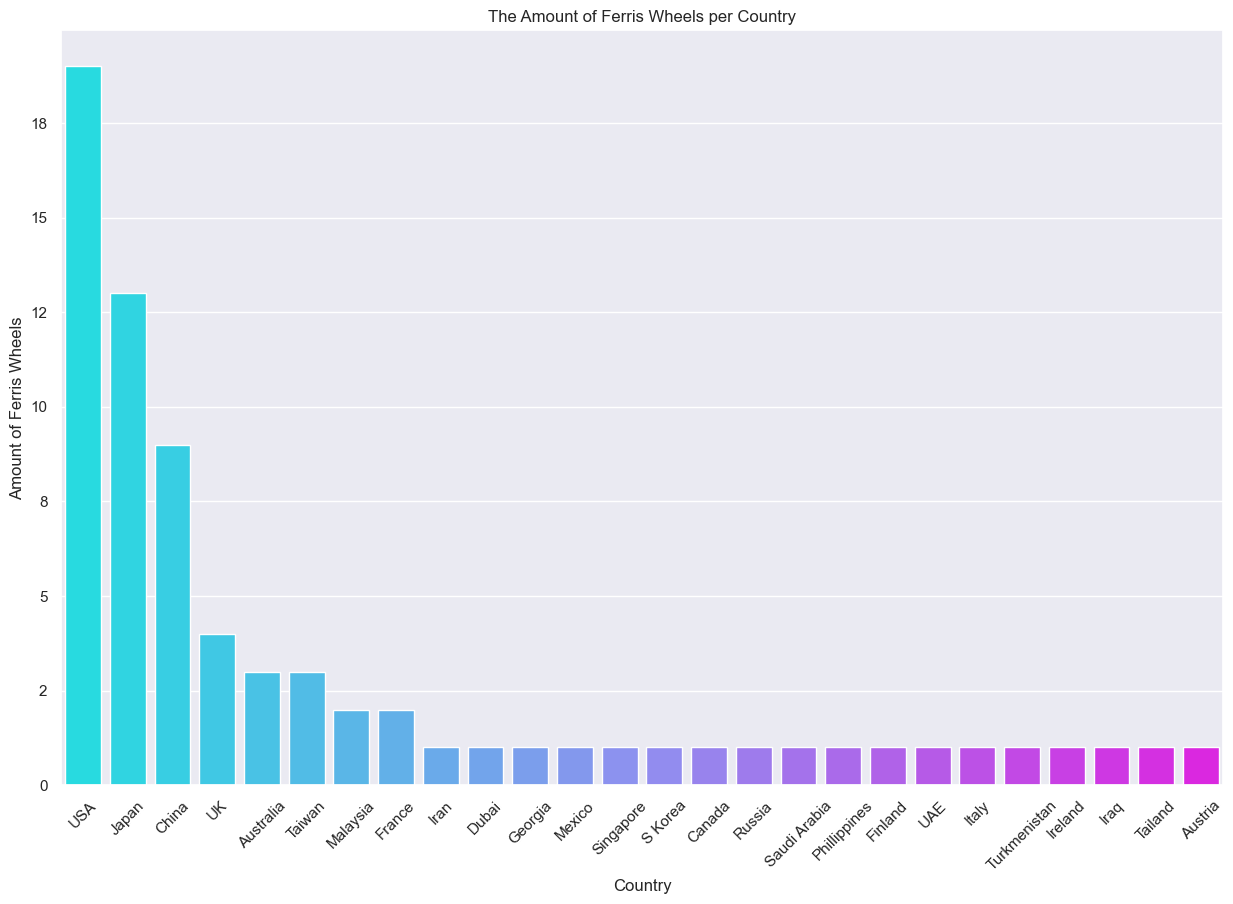

In [5]:
# visualtisation

from matplotlib.ticker import StrMethodFormatter

plt.figure(figsize=(15,10), dpi=100)
sns.set_theme(style="darkgrid")
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
sns.countplot(x="country", data=wheels, order=wheels["country"].value_counts().index, palette="cool")
plt.xticks(rotation=45)
plt.title("The Amount of Ferris Wheels per Country")
plt.xlabel("Country")
plt.ylabel("Amount of Ferris Wheels")
sns.set_context("notebook", font_scale=0.8)

## Size Comparison 

Next I wanted to see if there is a correlation between the overall size (height and width) of the ferriswheel and the number of cabins.


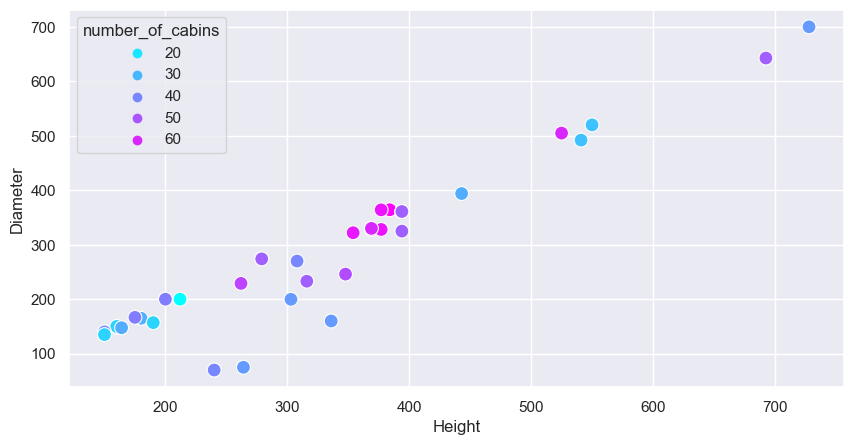

In [6]:
#visualisation of ferriswheel size and the number of cabins

plt.figure(figsize=(10,5), dpi=100)
sns.set_theme(style="darkgrid")
sns.scatterplot(x="height",y="diameter",data=wheels, palette = "cool", hue= "number_of_cabins", s=100)
plt.ylabel("Diameter")
plt.xlabel("Height")
plt.title("")
sns.set_context("notebook", font_scale=0.8)

It turns out that the the biggest ferriswheels don't have the biggest amount of cabins. 

## Size over Time


I assumed that over time the size of the ferriswheels would've increased so I wanted to visualise it.

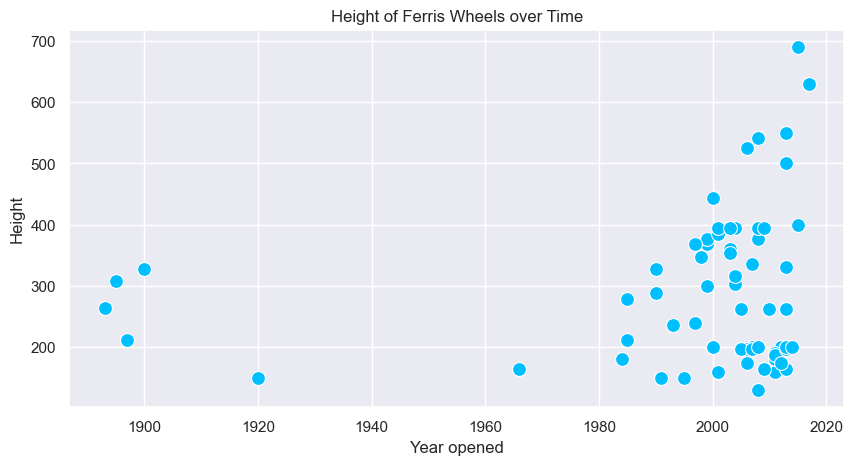

In [7]:
# size of wheels over time

# add coloum with just the year
wheels["year"] = pd.DatetimeIndex(wheels["opened"]).year
wheels.head(1)

#plotting size of wheels over time

plt.figure(figsize=(10,5), dpi=100)
sns.set_theme(style="darkgrid")
sns.scatterplot(x="year", 
                y="height", 
                data=wheels, 
                palette="cool",
                color = "deepskyblue", 
                s=100)
plt.title("Height of Ferris Wheels over Time")
plt.xlabel("Year opened")
plt.ylabel("Height")
sns.set_context("notebook", font_scale=0.8)

This plot offered a surprise to me: The fact that there are barely any ferris wheels in the data set that have been built between 1900 and 1980. Starting 1980 it looks like there was some sort of ferris wheel building boom. The built ferris wheels had all sorts of sizes but the biggest ones have been built after the year 2000.

## Ferris Wheels across the Globe

I struggled creating a map with markers for every location since the location coloumn in the data set was inconsistent with its naming convention. I found the geopy package which returns longitude and latitude data for a given query. So I used a for loop to retrieve the goadata for every location in the coloumn and added a 0,0 instead of NaN for empty values since the folium marker gave me an error message when I used NaN.

In [6]:
# creation of map with all ferriswheels 
#getting longitude and latitude from the location coloumn

from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="ferris")

for i in wheels.index:
    try:
        #tries fetch address from geopy
        location = geolocator.geocode(wheels['location'][i])
        
        #append lat/long to column using dataframe location
        wheels.loc[i,'latitude'] = location.latitude
        wheels.loc[i,'longitude'] = location.longitude
        
    except:
        #catches exception for the case where no value is returned
        
        wheels.loc[i,'latitude'] = float("0.0")
        wheels.loc[i,'longitude'] = float("0.0")

In [7]:
# checking everything worked

wheels.head()

,name,height,diameter,opened,closed,country,location,number_of_cabins,passengers_per_cabin,seating_capacity,...,status,design_manufacturer,type,vip_area,ticket_cost_to_ride,official_website,turns,longitude,latitude,year
1,360 Pensacola Beach,200.0,NaN,2012-07-03,2013-01-01,USA,Pensacola Beach; Florida,42.0,6.0,252.0,...,Moved,Realty Masters of FL,Transportable,Yes,NaN,NaN,4.0,-87.135098,30.334235,2012.0
2,Amuran,303.0,199.8,2004-01-01,NaN,Japan,Kagoshima; Kyushu,36.0,NaN,NaN,...,Operating,NaN,NaN,NaN,NaN,NaN,1.0,130.511773,31.586052,2004.0
3,Asiatique Sky,200.0,200.0,2012-12-15,NaN,Tailand,Asiatique the Riverfront,42.0,NaN,NaN,...,Operating,Dutch Wheels (Vekoma),NaN,NaN,NaN,http://www.asiatiquesky.com/,NaN,100.503193,13.704218,2012.0
4,Aurora Wheel,295.0,272.0,NaN,NaN,Japan,Nagashima Spa Land; Mie; Honshu,NaN,NaN,NaN,...,Operating,NaN,Fixed,NaN,NaN,http://www.nagashima-onsen.co.jp/,NaN,0.000000,0.000000,NaN
5,Baghdad Eye,180.0,NaN,2011-01-01,NaN,Iraq,Al-Zawraa Park; Baghdad,40.0,6.0,240.0,...,Operating,NaN,NaN,NaN,3.5,NaN,NaN,0.000000,0.000000,2011.0


After I got my geodata stored in the dataframe I started creating an empty map and then added map markers for every ferris wheel location. Ferris wheel hotspots seem to be the USA, Europe and South East Asia. This might have something to do with increased importance of tourism in these areas compared to say Africa.

In [13]:
# creating an empty map in folium

import folium
m = folium.Map(location=[20,0], tiles="cartodbpositron", zoom_start=2.5)

In [14]:
# adding markers for every ferriswheel 

for i in range(0,len(wheels)):
   folium.Marker(
      location=[wheels.iloc[i]['latitude'], wheels.iloc[i]['longitude']],
      popup=wheels.iloc[i]['name']
).add_to(m)
m